In [1]:
from encoder import Encoder

import featuretools as ft
from featuretools.tests.testing_utils import make_ecommerce_entityset

In [2]:
enc = Encoder()

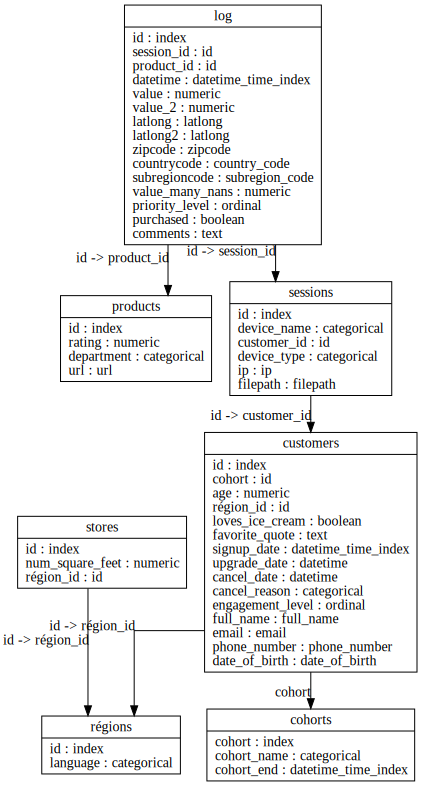

In [3]:
es = make_ecommerce_entityset()
es.plot()

In [4]:
f1 = ft.Feature(es["log"]["product_id"])
f2 = ft.Feature(es["log"]["purchased"])
f3 = ft.Feature(es["log"]["value"])
f4 = ft.Feature(es["log"]["countrycode"])

features = [f1, f2, f3, f4]
ids = [0, 1, 2, 3, 4, 5]
feature_matrix = ft.calculate_feature_matrix(features, es,
                                             instance_ids=ids)
feature_matrix

,product_id,purchased,value,countrycode
id,,,,
0,coke zero,True,0.0,US
1,coke zero,True,5.0,US
2,coke zero,True,10.0,US
3,car,True,15.0,US
4,car,True,20.0,US
5,toothpaste,True,0.0,AL


In [5]:
enc.fit(feature_matrix, features)

OneHotEncoder(cols=['product_id', 'countrycode'], drop_invariant=False,
       handle_missing='value', handle_unknown='value', return_df=True,
       use_cat_names=False, verbose=0)

In [6]:
enc.transform(feature_matrix)

,product_id_1,product_id_2,product_id_3,purchased,value,countrycode_1,countrycode_2
id,,,,,,,
0,1,0,0,True,0.0,1,0
1,1,0,0,True,5.0,1,0
2,1,0,0,True,10.0,1,0
3,0,1,0,True,15.0,1,0
4,0,1,0,True,20.0,1,0
5,0,0,1,True,0.0,0,1


In [7]:
enc.fit_transform(feature_matrix, features)

,product_id_1,product_id_2,product_id_3,purchased,value,countrycode_1,countrycode_2
id,,,,,,,
0,1,0,0,True,0.0,1,0
1,1,0,0,True,5.0,1,0
2,1,0,0,True,10.0,1,0
3,0,1,0,True,15.0,1,0
4,0,1,0,True,20.0,1,0
5,0,0,1,True,0.0,0,1


In [8]:
enc.get_features()

[<Feature: product_id = coke zero>,
 <Feature: product_id = car>,
 <Feature: product_id = toothpaste>,
 <Feature: purchased>,
 <Feature: value>,
 <Feature: countrycode = US>,
 <Feature: countrycode = AL>]

In [9]:
enc.method.mapping

[{'col': 'product_id', 'mapping':     product_id_1  product_id_2  product_id_3
   1             1             0             0
   2             0             1             0
   3             0             0             1
  -1             0             0             0
  -2             0             0             0},
 {'col': 'countrycode', 'mapping':     countrycode_1  countrycode_2
   1              1              0
   2              0              1
  -1              0              0
  -2              0              0}]

In [10]:
enc = Encoder(method='ordinal', to_encode=['product_id'])
fm_enc = enc.fit_transform(feature_matrix, features)

In [11]:
enc.get_features()

[<Feature: PRODUCT_ID_ordinal>,
 <Feature: purchased>,
 <Feature: value>,
 <Feature: countrycode>]

In [12]:
enc.method.mapping[0]['mapping']

coke zero     1
car           2
toothpaste    3
NaN          -2
dtype: int64

In [13]:
enc.method.mapping

[{'col': 'product_id', 'mapping': coke zero     1
  car           2
  toothpaste    3
  NaN          -2
  dtype: int64, 'data_type': dtype('O')}]

In [14]:
enc3 = Encoder(method='binary', to_encode=['product_id'])
fm_enc3 = enc3.fit(feature_matrix, features)

In [20]:
enc3.method.base_n_encoder.mapping[0]['mapping']

,product_id_0,product_id_1,product_id_2
1,0,0,1
2,0,1,0
3,0,1,1
-1,0,0,0
-2,0,0,0


In [19]:
enc3.method.base_n_encoder.ordinal_encoder.mapping[0]['mapping']

coke zero     1
car           2
toothpaste    3
NaN          -2
dtype: int64